# Natural language processing

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
<!-- ![sample](../misc/images/bar-plot.png) -->
Выведи эти количества для каждой категории. 

                 id                                       comment_text  toxic   
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0  \
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


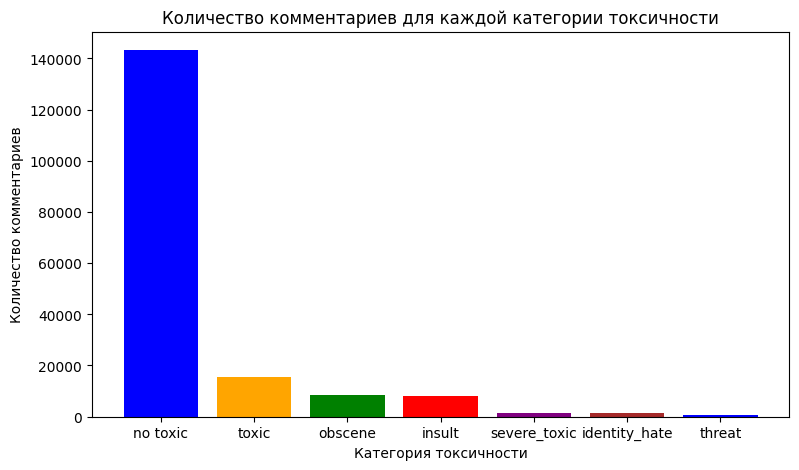

Количество комментариев:
no toxic         143346
toxic             15294
obscene            8449
insult             7877
severe_toxic       1595
identity_hate      1405
threat              478
dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/toxic.csv')
print(f"{df.head(5)}")

df['no toxic'] = 1 - df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)

# df['no toxic'].value_counts()

countColumns = df.iloc[:, 2:].sum().sort_values(ascending=False)
plt.figure(figsize=(9, 5))
plt.bar(countColumns.index, countColumns.values, color=['blue',  'orange', 'green','red', 'purple', 'brown'])
plt.xlabel('Категория токсичности')
plt.ylabel('Количество комментариев')
plt.title('Количество комментариев для каждой категории токсичности')
plt.show()

print("Количество комментариев:")
print(countColumns)


# Количество комментариев:
# no toxic         143346
# toxic             15294
# obscene            8449
# insult             7877
# severe_toxic       1595
# identity_hate      1405
# threat              478
# dtype: int64

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

def tokensComments(com):
    stop_words = set(stopwords.words('english'))
    comment = com.lower()
    tokens = word_tokenize(comment)
    tokens = [token for token in tokens if token in re.findall("[a-z]+",token)]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

df_t2 = df.copy()
comIdx = '000103f0d9cfb60f'

df_t2['comment_text_tokens'] = df_t2['comment_text'].apply(tokensComments)

tok = df_t2[df_t2['id'] == comIdx]['comment_text_tokens'].values[0] #комментарий по индексу

print(f"Токенов: {len(tok)} {tok}")

# comment = df_t2[df_t2['id'] == comIdx]['comment_text'].values[0] #комментарий по индексу
# print(f"comment:\n {comment}")

# comment = comment.lower()
# print(f"lower:\n {comment}")

# tokens = word_tokenize(comment)
# print(f"tokens:\n {tokens}")

# tokens = [token for token in tokens if token in re.findall("[a-z]+",token)]
# print(f"only Symb:\n {tokens}")

# stop_words = set(stopwords.words('english'))
# tokens = [token for token in tokens if token not in stop_words]
# print(f"without stopwords:\n {tokens}")

# print(f"Токенов: {len(tokens)}")


# Токенов: 9 ['matches', 'background', 'colour', 'seemingly', 'stuck', 'thanks', 'talk', 'january', 'utc']

Токенов: 9 ['matches', 'background', 'colour', 'seemingly', 'stuck', 'thanks', 'talk', 'january', 'utc']


## Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.
TF - отражает, насколько часто знч встречается в документе
IDF - отражает важность знач в коллекции документов

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
df_t2['joinTokens'] = [' '.join(token) for token in df_t2['comment_text_tokens']]
# xx = df_t2['comment_text']
xx = df_t2['joinTokens']
# xx = df_t2['comment_text_tokens'] 
yy = df_t2[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','no toxic']]
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3, random_state=21, shuffle=True)

tfIdfer = TfidfVectorizer(max_features=3000)
X_trainTransform = tfIdfer.fit_transform(X_train)

print("Размерность тренировочной выборки:", X_trainTransform.shape)
# (111699, 3000)

Размерность тренировочной выборки: (111699, 3000)


## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

Задача Multi-Label классификации относится к классификации, где каждый пример данных может быть отнесен к нескольким классам одновременно 
RidgeClassifier является одним из алгоритмов классификации, использующих линейные модели. Он основан на регуляризованной линейной регрессии и может использоваться для решения задач классификации в контексте Multi-Label.
ROC-AUC  это метрика, используемая для оценки качества моделей классификации

In [33]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

model = RidgeClassifier()

model.fit(X_trainTransform, y_train)

X_testTansformed = tfIdfer.transform(X_test)# Преобразование текста с помощью TF-IDF

y_pred = model.predict(X_testTansformed)# Предсказание 

rocAuc = roc_auc_score(y_test, y_pred)

print("ROC-AUC:", rocAuc)
# ROC-AUC: 0.6641234437513172

ROC-AUC: 0.6641234437513172


## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
from nltk.corpus import sentiwordnet as swn

import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')


newFeaturesTrain = []
newFeaturesTest = []

for comment in X_train:
    # print(f"COMMENT:  {comment}")
    length = len(comment.split(' '))
    lengthSS = comment.split(' ')
    if length != 0:
        unique_words = len(set(comment.split(' '))) / len(comment.split(' '))
    
    
        for token in lengthSS:
            positive_words = []
            negative_words = []
            synsets = list(swn.senti_synsets(token))
        
            if synsets:
                positivity = sum([synset.pos_score() for synset in synsets]) / len(synsets)
                negativity = sum([synset.neg_score() for synset in synsets]) / len(synsets)
            
                if positivity > negativity:
                    positive_words.append(token)
                elif negativity > positivity:
                    negative_words.append(token)

                try:
                    negative_ratio = len(negative_words) / len(positive_words)
                except ZeroDivisionError:
                    negative_ratio = 0.0

                try:
                    positive_ratio = len(positive_words) / len(negative_words)
                except ZeroDivisionError:
                    positive_ratio = 0.0          
    else:
        unique_words = 0
        negative_ratio = 0
        positive_ratio = 0
    newFeaturesTrain.append([length, unique_words, negative_ratio, positive_ratio])


for comment in X_test:
    # print(f"COMMENT:  {comment}")
    length = len(comment.split(' '))
    lengthSS = comment.split(' ')
    if length != 0:
        unique_words = len(set(comment.split(' '))) / len(comment.split(' '))
    
    
        for token in lengthSS:
            positive_words = []
            negative_words = []
            synsets = list(swn.senti_synsets(token))
        
            if synsets:
                positivity = sum([synset.pos_score() for synset in synsets]) / len(synsets)
                negativity = sum([synset.neg_score() for synset in synsets]) / len(synsets)
            
                if positivity > negativity:
                    positive_words.append(token)
                elif negativity > positivity:
                    negative_words.append(token)

                try:
                    negative_ratio = len(negative_words) / len(positive_words)
                except ZeroDivisionError:
                    if len(negative_words) != 0:
                        negative_ratio = 1.0
                    else:
                        negative_ratio = 0.0

                try:
                    positive_ratio = len(positive_words) / len(negative_words)
                except ZeroDivisionError:
                    if len(positive_words) != 0:
                        positive_ratio = 1.0
                    else:
                        positive_ratio = 0.0          
    else:
        unique_words = 0
        negative_ratio = 0
        positive_ratio = 0
    newFeaturesTest.append([length, unique_words, negative_ratio, positive_ratio])
    
# Добавление дополнительных признаков к TF-IDF признакам
X_train_combined = hstack((X_trainTransform, newFeaturesTrain))
X_test_combined = hstack((X_testTansformed, newFeaturesTest))

model = RidgeClassifier()


model.fit(X_train_combined, y_train)# Обучение модели

y_pred = model.predict(X_test_combined)


roc_auc = roc_auc_score(y_test, y_pred)# Вычисление рок аук

print("Значение рок аук для тестовой выборки:", roc_auc)
# Значение рок аук для тестовой выборки: 0.6648840838830965
print(f"{roc_auc - rocAuc}")
# 0.0007606401317793443

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/serghead/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/serghead/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Значение ROC-AUC для тестовой выборки: 0.6648840838830965
0.0007606401317793443
